In [ ]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
import os
import zipfile

# Check if the file exists before attempting to open it
if os.path.exists('/content/dogs-vs-cats.zip'):
    try:
        zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
        zip_ref.extractall()
        zip_ref.close()
    except zipfile.BadZipFile:
        print("Error: 'archive.zip' is either not a zip file or is corrupted.")
        # You might want to download the file again or check its integrity
else:
    print("Error: '/content/dogs-vs-cats.zip' not found. Please download the dataset.")

In [ ]:
train_ds =keras.utils.image_dataset_from_directory(
    directory= '/content/train'  ,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds  = train_ds.map(process)
validation_ds = validation_ds.map(process)



In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
history = model.fit(train_ds, epochs=10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 82ms/step - accuracy: 0.5604 - loss: 2.7929 - val_accuracy: 0.6310 - val_loss: 0.7185
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 74ms/step - accuracy: 0.6728 - loss: 0.6263 - val_accuracy: 0.6868 - val_loss: 0.5975
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7462 - loss: 0.5183 - val_accuracy: 0.6594 - val_loss: 0.7384
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7934 - loss: 0.4525 - val_accuracy: 0.6294 - val_loss: 0.7462
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 82ms/step - accuracy: 0.8289 - loss: 0.3855 - val_accuracy: 0.7634 - val_loss: 0.5224
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.8585 - loss: 0.3245 - val_accuracy: 0.7032 - val_loss: 1.0148
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8947 - loss: 0.2473 - val_accuracy: 0.8012 - val_loss: 0.5438
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9229 - loss: 0.1903 - 

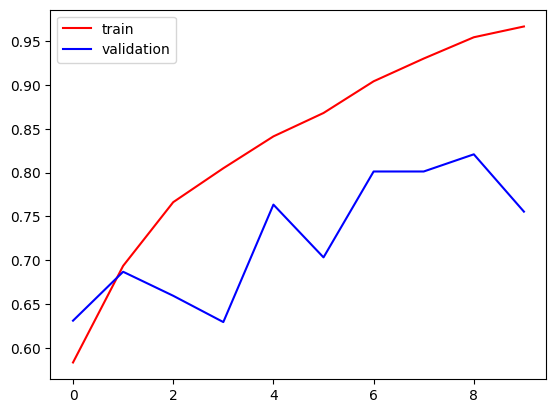

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validation')

plt.legend()
plt.show()

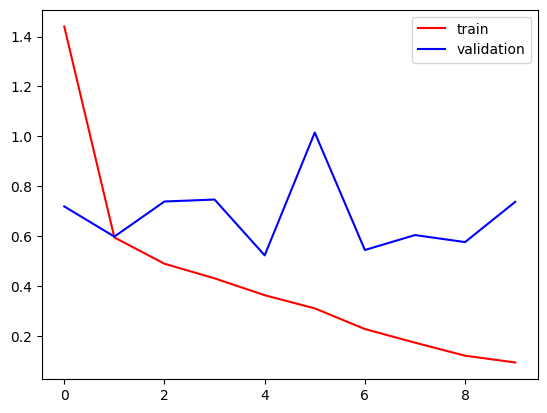

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'],color = 'blue', label = 'validation')

plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
img=cv2.imread('/content/pexels-pixabay-220938.jpg')

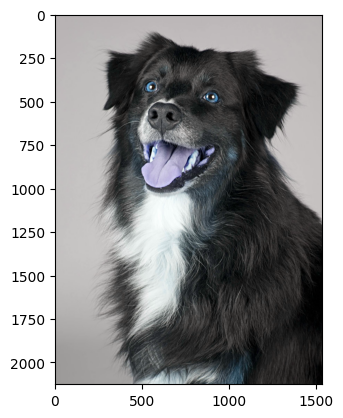

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(2126, 1535, 3)

In [ ]:
img = cv2.resize(img,(256,256))

In [ ]:
test_input = img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)

In [ ]:
img1=cv2.imread('/content/pexels-pixabay-45201.jpg')

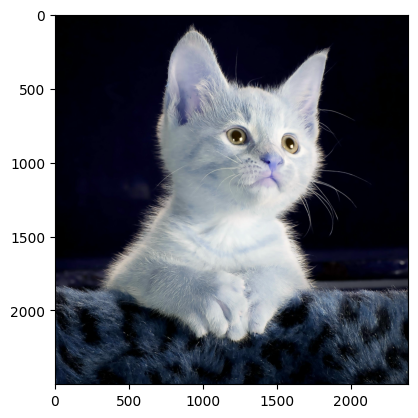

In [ ]:
plt.imshow(img1)

In [ ]:
img1.shape

(2500, 2392, 3)

In [ ]:
img1 = cv2.resize(img1,(256,256))

In [ ]:
test_input = img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[3.2355244e-29]], dtype=float32)